In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 案例：NBA球员数据分析

In [ ]:
# 获取数据
data = pd.read_csv("../data/nba_2017_nba_players_with_salary.csv")
data[:4]

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,GP,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,81,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,81,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,76,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,75,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12


In [ ]:
# 形状
data.shape

(342, 38)

In [ ]:
# 描述信息
data.describe

<bound method NDFrame.describe of       Rk             PLAYER POSITION  AGE    MP    FG   FGA    FG%   3P  3PA  \
0      1  Russell Westbrook       PG   28  34.6  10.2  24.0  0.425  2.5  7.2   
1      2       James Harden       PG   27  36.4   8.3  18.9  0.440  3.2  9.3   
2      3      Isaiah Thomas       PG   27  33.8   9.0  19.4  0.463  3.2  8.5   
3      4      Anthony Davis        C   23  36.1  10.3  20.3  0.505  0.5  1.8   
4      6   DeMarcus Cousins        C   26  34.2   9.0  19.9  0.452  1.8  5.0   
..   ...                ...      ...  ...   ...   ...   ...    ...  ...  ...   
337  466      Brice Johnson       PF   22   3.0   0.7   2.3  0.286  0.0  0.0   
338  471         Mike Tobey        C   22  12.5   0.5   2.0  0.250  0.0  0.0   
339  475         Alonzo Gee       SF   29   6.8   0.2   1.1  0.214  0.0  0.2   
340  481     John Lucas III       PG   34   2.2   0.2   0.8  0.250  0.0  0.2   
341  482     Aaron Harrison       SG   22   3.4   0.0   0.8  0.000  0.0  0.4   

     

## 数据相关性

In [ ]:
# data_cor = data.loc[:, ['RPM', 'AGE', 'SALARY_MILLIONS', 'ORB', 'DRB', 'TRB',
#                        'AST', 'STL', 'BLK', 'TOV', 'PF', 'POINTS', 'GP', 'MPG', 'ORPM', 'DRPM']]
data_cor = data[
    [
        "RPM",
        "AGE",
        "SALARY_MILLIONS",
        "ORB",
        "DRB",
        "TRB",
        "AST",
        "STL",
        "BLK",
        "TOV",
        "PF",
        "POINTS",
        "GP",
        "MPG",
        "ORPM",
        "DRPM",
    ]
]
data_cor.head()

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
0,6.27,28,26.50,1.7,9.0,10.7,10.4,1.6,0.4,5.4,2.3,31.6,81,34.6,6.74,-0.47
1,4.81,27,26.50,1.2,7.0,8.1,11.2,1.5,0.5,5.7,2.7,29.1,81,36.4,6.38,-1.57
2,1.83,27,6.59,0.6,2.1,2.7,5.9,0.9,0.2,2.8,2.2,28.9,76,33.8,5.72,-3.89
3,4.35,23,22.12,2.3,9.5,11.8,2.1,1.3,2.2,2.4,2.2,28.0,75,36.1,0.45,3.90
4,4.20,26,16.96,2.1,8.9,11.0,4.6,1.4,1.3,3.7,3.9,27.0,72,34.2,3.56,0.64


In [ ]:
# 数据相关性 corr
corr = data_cor.corr()
corr

,RPM,AGE,SALARY_MILLIONS,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,POINTS,GP,MPG,ORPM,DRPM
RPM,1.000000,0.175820,0.477542,0.388764,0.623515,0.587853,0.481971,0.599008,0.463097,0.492014,0.434226,0.604432,0.340810,0.549449,0.769822,0.578388
AGE,0.175820,1.000000,0.353312,-0.015752,0.088859,0.062064,0.114908,0.069892,-0.062917,0.030673,0.005512,0.031422,0.051863,0.099657,0.136177,0.100636
SALARY_MILLIONS,0.477542,0.353312,1.000000,0.264954,0.531569,0.482088,0.486159,0.446763,0.260288,0.536993,0.341512,0.635425,0.348093,0.594162,0.503682,0.102307
ORB,0.388764,-0.015752,0.264954,1.000000,0.731345,0.861103,-0.011632,0.169075,0.654265,0.274670,0.557957,0.284908,0.296975,0.342140,0.102113,0.476857
DRB,0.623515,0.088859,0.531569,0.731345,1.000000,0.976244,0.350786,0.485726,0.660733,0.598043,0.670708,0.648267,0.473376,0.684662,0.428433,0.426536
TRB,0.587853,0.062064,0.482088,0.861103,0.976244,1.000000,0.257379,0.415318,0.698947,0.531124,0.675389,0.573219,0.446355,0.618587,0.352018,0.468489
AST,0.481971,0.114908,0.486159,-0.011632,0.350786,0.257379,1.000000,0.683438,0.050367,0.839331,0.323374,0.678980,0.334944,0.640273,0.673077,-0.107280
STL,0.599008,0.069892,0.446763,0.169075,0.485726,0.415318,0.683438,1.000000,0.257638,0.669642,0.509130,0.653695,0.441132,0.749596,0.593146,0.177728
BLK,0.463097,-0.062917,0.260288,0.654265,0.660733,0.698947,0.050367,0.257638,1.000000,0.310396,0.601185,0.352639,0.314585,0.387176,0.138512,0.546464
TOV,0.492014,0.030673,0.536993,0.274670,0.598043,0.531124,0.839331,0.669642,0.310396,1.000000,0.566313,0.834074,0.398315,0.743525,0.621213,-0.025302


### 显示热力图 heatmap

<AxesSubplot:>

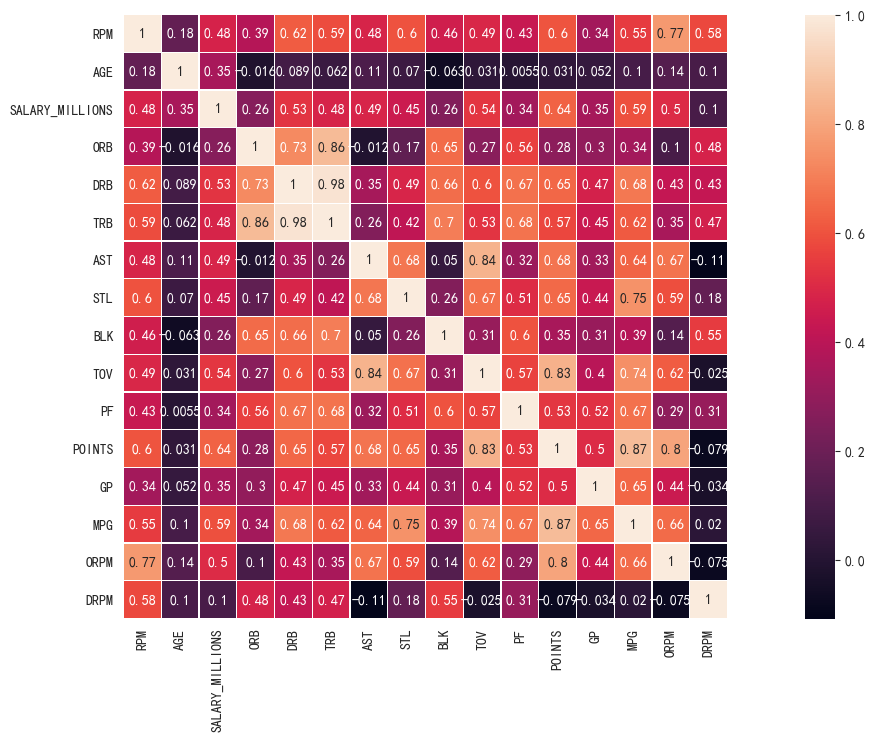

In [ ]:
# 显示热力图
# 让图片变大
plt.figure(figsize=(20, 8), dpi=100)

# square=True  正方形
# linewidths   线宽度
# annot=True   显示里面的值
sns.heatmap(corr, square=True, linewidths=0.1, annot=True)

## 基本数据排名分析

In [ ]:
# 按照效率值排名
# 获取所有行 降序
data.loc[:, ["PLAYER", "RPM", "AGE"]].sort_values(by="RPM", ascending=False).head()

,PLAYER,RPM,AGE
6,LeBron James,8.42,32
37,Chris Paul,7.92,31
8,Stephen Curry,7.41,28
120,Draymond Green,7.14,26
7,Kawhi Leonard,7.08,25


In [ ]:
# 按照球员薪资排名
# 获取所有行 降序
data.loc[:, ["PLAYER", "RPM", "AGE", "SALARY_MILLIONS"]].sort_values(
    by="SALARY_MILLIONS", ascending=False
).head()

,PLAYER,RPM,AGE,SALARY_MILLIONS
6,LeBron James,8.42,32,30.96
25,Mike Conley,4.47,29,26.54
67,Al Horford,1.82,30,26.54
0,Russell Westbrook,6.27,28,26.50
1,James Harden,4.81,27,26.50


## 常用的三个数据可视化方法

### 单变量

#### 设置图形基本样式 set_style

In [ ]:
sns.set_style("darkgrid")

#### subplot画图

d:\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\anaconda3\envs\ai\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

Text(0, 0.5, 'AGE')

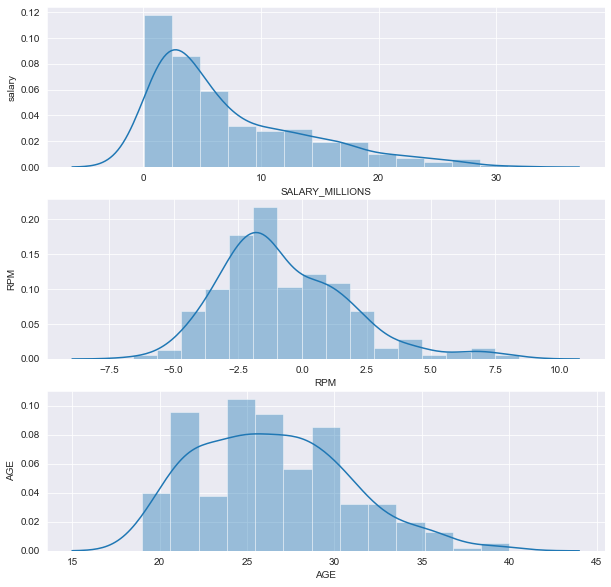

In [ ]:
plt.figure(figsize=(10, 10))
# 创建三幅图,三行一列,这是第一个
plt.subplot(3, 1, 1)
sns.distplot(data["SALARY_MILLIONS"])
plt.ylabel("salary")

plt.subplot(3, 1, 2)
sns.distplot(data["RPM"])
plt.ylabel("RPM")

plt.subplot(3, 1, 3)
sns.distplot(data["AGE"])
plt.ylabel("AGE")

### 双变量

#### 直方图 hex

d:\anaconda3\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


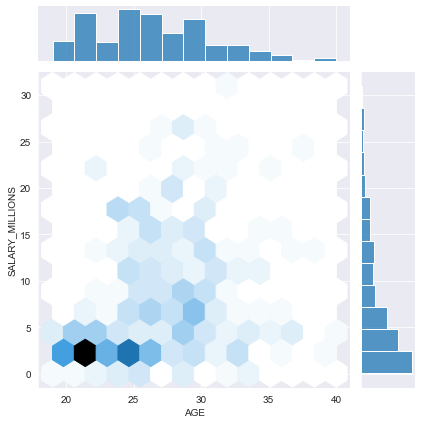

In [ ]:
sns.jointplot(data.AGE, data.SALARY_MILLIONS, kind="hex")

#### 核密度 kde

d:\anaconda3\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


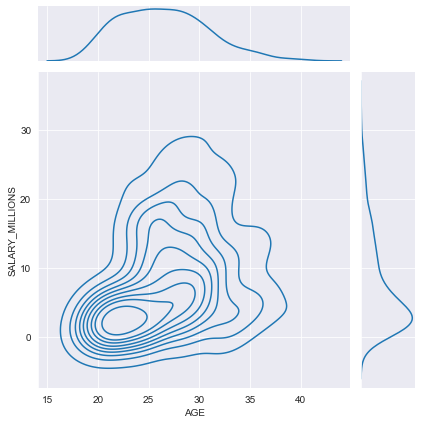

In [ ]:
sns.jointplot(data.AGE, data.SALARY_MILLIONS, kind="kde")

#### 散点图 scatter

d:\anaconda3\envs\ai\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


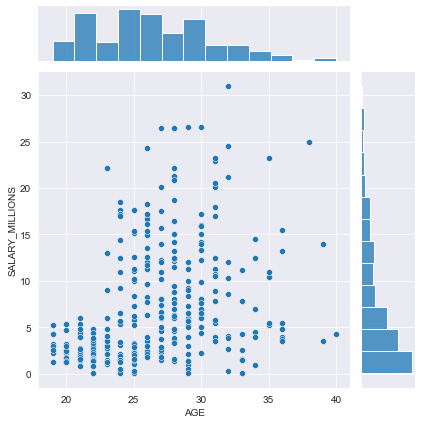

In [ ]:
sns.jointplot(data.AGE, data.SALARY_MILLIONS)

### 多变量 pairpolt

In [ ]:
multi_data = data.loc[:, ["RPM", "SALARY_MILLIONS", "AGE", "POINTS"]]
multi_data.head()

,RPM,SALARY_MILLIONS,AGE,POINTS
0,6.27,26.50,28,31.6
1,4.81,26.50,27,29.1
2,1.83,6.59,27,28.9
3,4.35,22.12,23,28.0
4,4.20,16.96,26,27.0


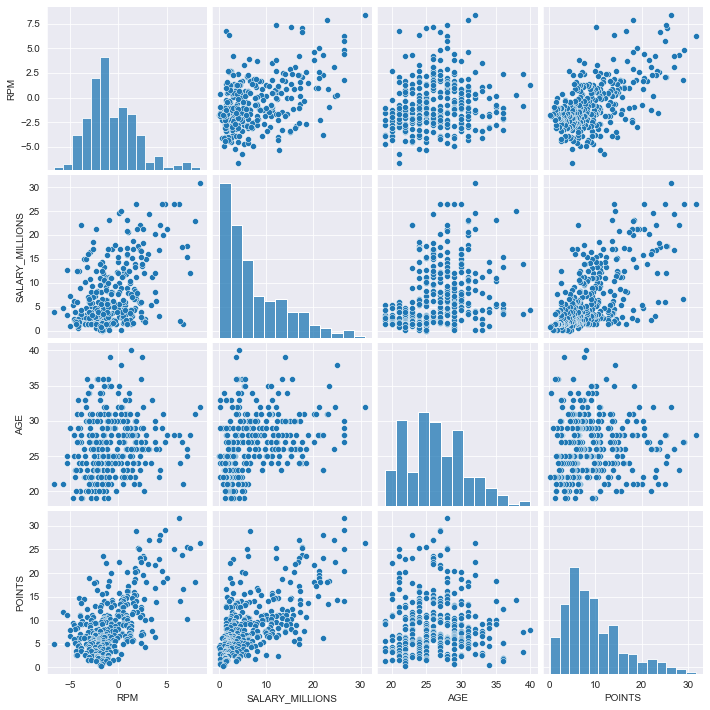

In [ ]:
sns.pairplot(multi_data)

## 衍生变量的一些可视化实践-以年龄为例

### 定义分类年龄的函数

In [ ]:
# 定义分类年龄的函数
# 每一行都检测一遍
def age_cut(df):
    if df.AGE <= 24:
        return "young"
    elif df.AGE >= 30:
        return "old"
    else:
        return "best"

In [ ]:
# 对年龄进行划分
# axis=1 按照行检测
data["age_cut"] = data.apply(lambda x: age_cut(x), axis=1)
data.head()

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,MPG,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,34.6,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,best
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,36.4,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,best
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,33.8,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,best
3,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,1.8,...,36.1,0.45,3.90,4.35,12.81,19.2,100.19,31,22.12,young
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,34.2,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,best


In [ ]:
# 计数
data["cut"] = 1

### 通过函数判断

In [ ]:
# 通过 loc 判断,只要 age_cut 为best的
# data.loc[data.age_cut == "best"]

data[data.age_cut == "best"]

,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,3PA,...,ORPM,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,age_cut,cut
0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,7.2,...,6.74,-0.47,6.27,17.34,23.0,102.31,46,26.50,best,1
1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,9.3,...,6.38,-1.57,4.81,15.54,19.0,102.98,54,26.50,best,1
2,3,Isaiah Thomas,PG,27,33.8,9.0,19.4,0.463,3.2,8.5,...,5.72,-3.89,1.83,8.19,16.1,99.84,51,6.59,best,1
4,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,5.0,...,3.56,0.64,4.20,11.26,17.8,97.11,30,16.96,best,1
5,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,7.7,...,4.63,-1.49,3.14,10.72,15.9,99.68,38,24.33,best,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
326,452,Lamar Patterson,SG,25,8.0,0.6,3.0,0.200,0.2,1.2,...,-2.23,0.62,-1.61,0.03,-0.4,93.96,1,0.25,best,1
327,454,Cole Aldrich,C,28,8.6,0.7,1.4,0.523,0.0,0.0,...,-1.82,1.83,0.01,1.04,7.6,97.42,23,7.64,best,1
329,456,Jordan Hill,C,29,6.7,0.7,1.9,0.385,0.0,0.0,...,-2.31,1.16,-1.15,0.06,1.5,90.23,2,4.00,best,1
333,459,Ryan Kelly,PF,25,6.9,0.5,1.8,0.286,0.3,0.6,...,-1.94,1.45,-0.49,0.08,7.3,96.26,6,1.58,best,1


In [ ]:
# 判断年龄最佳的人的薪水
data[data.age_cut == "best"].SALARY_MILLIONS.head()

0    26.50
1    26.50
2     6.59
4    16.96
5    24.33
Name: SALARY_MILLIONS, dtype: float64

### 基于年龄段对球员薪水和效率值进行分析

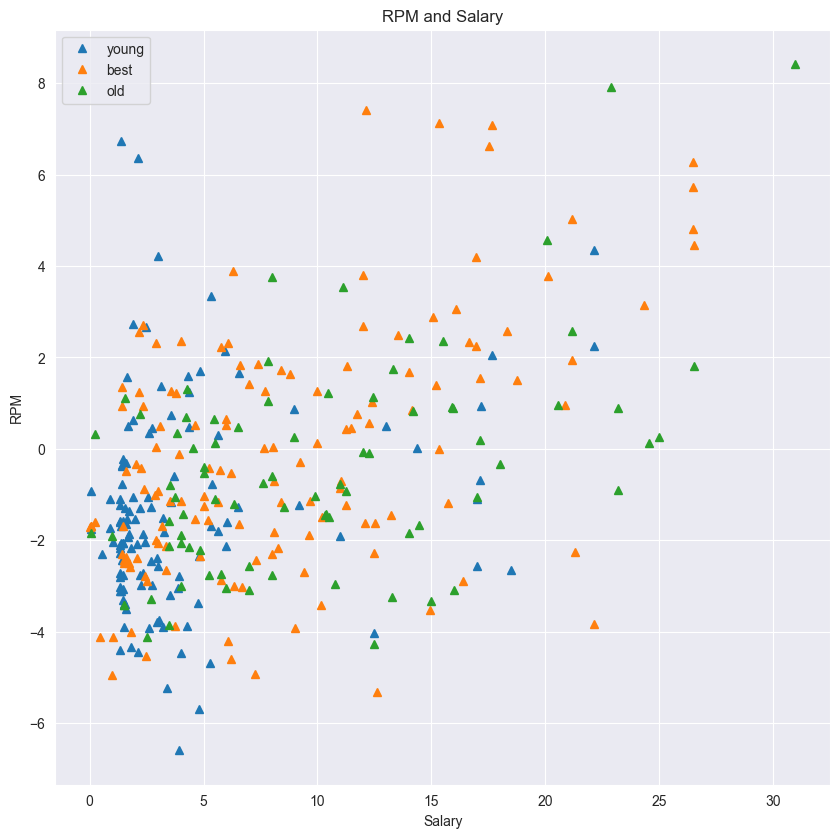

In [ ]:
# 设置风格
sns.set_style("darkgrid")
plt.figure(figsize=(10, 10), dpi=100)
plt.title("RPM and Salary")
plt.xlabel("Salary")
plt.ylabel("RPM")

# 添加数据
x1 = data[data.age_cut == "young"].SALARY_MILLIONS
y1 = data[data.age_cut == "young"].RPM
plt.plot(x1, y1, "^", label="young")

x2 = data[data.age_cut == "best"].SALARY_MILLIONS
y2 = data[data.age_cut == "best"].RPM
plt.plot(x2, y2, "^", label="best")

x3 = data[data.age_cut == "old"].SALARY_MILLIONS
y3 = data[data.age_cut == "old"].RPM
plt.plot(x3, y3, "^", label="old")

# 显示图例
plt.legend(loc="best")

plt.show()

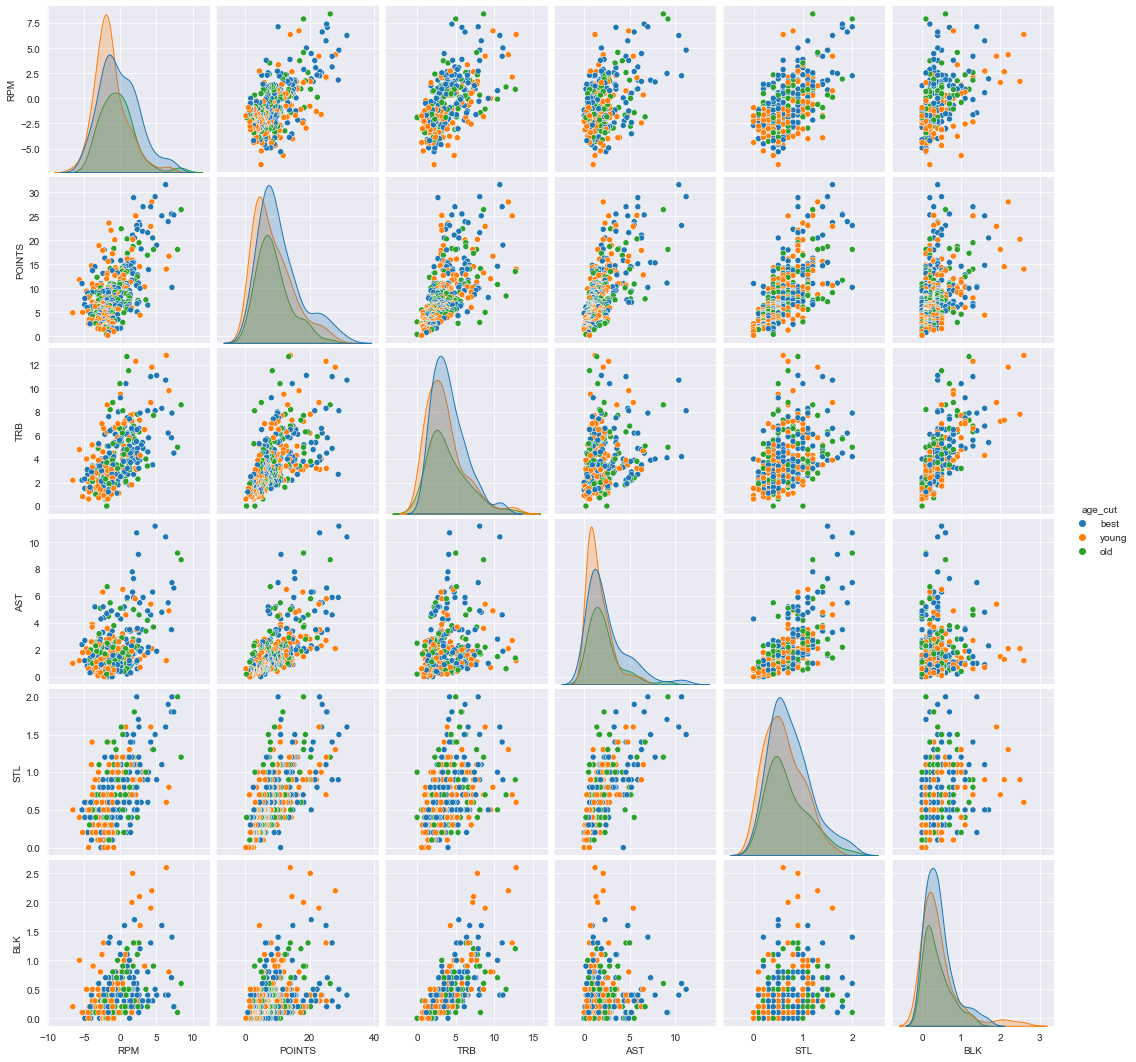

In [ ]:
# 数据混合分析
data2 = data.loc[:, ["RPM", "POINTS", "TRB", "AST", "STL", "BLK", "age_cut"]]
sns.pairplot(data2, hue="age_cut")

## 球队数据分析
### agg 如何进行数据聚合

In [ ]:
# 显示里面的最高薪资
data.groupby(by="age_cut").agg({"SALARY_MILLIONS": np.max})

,SALARY_MILLIONS
age_cut,
best,26.54
old,30.96
young,22.12


In [ ]:
# 显示里面的最低薪资
data.groupby(by="age_cut").agg({"SALARY_MILLIONS": np.min})

,SALARY_MILLIONS
age_cut,
best,0.03
old,0.06
young,0.06


### 球队薪资平均值

In [ ]:
# 球队薪资平均值
data_team = data.groupby(by="TEAM").agg({"SALARY_MILLIONS": np.mean})
data_team.head()

,SALARY_MILLIONS
TEAM,
ATL,6.689167
ATL/CLE,5.040000
ATL/PHI/OKC,8.400000
BKN,5.704545
BKN/WSH,4.910000


In [ ]:
# 球队薪资水平排序
data_team.sort_values(by="SALARY_MILLIONS", ascending=False).head(10)

,SALARY_MILLIONS
TEAM,
CLE,17.095000
HOU,13.432000
GS,12.701429
ORL/TOR,11.125000
POR,9.730000
WSH,9.628889
ORL,9.490000
MIL/CHA,9.425000
SA,9.347273


### 按照分球队分年龄段，上榜球员降序排列，如上榜球员数相同，则按效率值降序排列

In [ ]:
#                                               薪水平均值, 效率值, 球员数量
data_rpm = data.groupby(by=["TEAM", "age_cut"]).agg(
    {"SALARY_MILLIONS": np.mean, "RPM": np.mean, "PLAYER": np.size}
)
data_rpm.head()

SALARY_MILLIONS       RPM  PLAYER
TEAM        age_cut                                   
ATL         best            4.678000 -1.768000       5
            old            12.775000  0.982500       4
            young           1.926667 -3.076667       3
ATL/CLE     old             5.040000 -2.485000       2
ATL/PHI/OKC best            8.400000  1.720000       1

In [ ]:
# 球员数量和效率值降序排列
data_rpm.sort_values(by=["PLAYER", "RPM"], ascending=False).head()

,,SALARY_MILLIONS,RPM,PLAYER
TEAM,age_cut,,,
CHA,young,3.835000,-0.362500,8
BOS,best,7.034286,0.647143,7
TOR,young,4.158571,-0.555714,7
BOS,young,2.337143,-1.821429,7
MIN,best,5.560000,0.828333,6


## 按照球队综合实力排名

In [ ]:
# 按照队伍划分
data_rpm2 = data.groupby(by=["TEAM"], as_index=False).agg(
    {
        "SALARY_MILLIONS": np.mean,
        "RPM": np.mean,
        "PLAYER": np.size,
        "POINTS": np.mean,
        "eFG%": np.mean,
        "MPG": np.mean,
        "AGE": np.mean,
    }
)
data_rpm2[:5]

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
0,ATL,6.689167,-1.178333,12,7.416667,0.442667,18.541667,27.000000
1,ATL/CLE,5.040000,-2.485000,2,7.650000,0.582000,21.050000,35.500000
2,ATL/PHI/OKC,8.400000,1.720000,1,13.100000,0.511000,26.100000,29.000000
3,BKN,5.704545,-1.224545,11,9.045455,0.487273,20.227273,27.636364
4,BKN/WSH,4.910000,-4.045000,2,8.150000,0.470000,17.350000,27.000000


### 按照球队效率值排列

In [ ]:
# 按照球队效率值排列
data_rpm2.sort_values(by="RPM", ascending=False).head()

,TEAM,SALARY_MILLIONS,RPM,PLAYER,POINTS,eFG%,MPG,AGE
18,GS,12.701429,3.478571,7,14.528571,0.575143,26.700000,28.714286
9,CLE,17.095000,2.566667,6,15.883333,0.555833,29.766667,28.000000
2,ATL/PHI/OKC,8.400000,1.720000,1,13.100000,0.511000,26.100000,29.000000
20,HOU,13.432000,1.582000,5,15.420000,0.534600,29.980000,27.200000
44,SA,9.347273,0.901818,11,9.818182,0.524182,21.472727,29.545455


## 利用箱线图和小提琴图进行数据分析

In [ ]:
# 选择球队
data.TEAM.isin(
    ["GS", "CLE", "SA", "LAC", "OKC", "UTAH", "CHA", "TOR", "NO", "BOS"]
).head()

0     True
1    False
2     True
3     True
4    False
Name: TEAM, dtype: bool

<AxesSubplot:xlabel='TEAM', ylabel='MPG'>

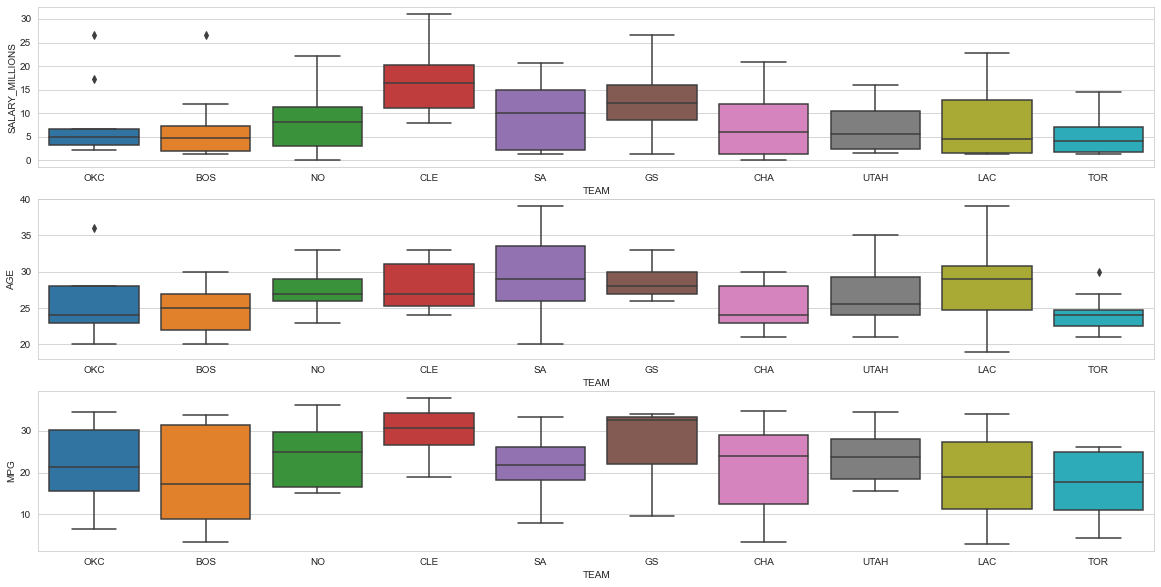

In [ ]:
# 设置浅色
sns.set_style("whitegrid")

plt.figure(figsize=(20, 10))
# 获取需要的数据
data_team2 = data[
    data.TEAM.isin(["GS", "CLE", "SA", "LAC", "OKC", "UTAH", "CHA", "TOR", "NO", "BOS"])
]

# 进行相应的绘图
plt.subplot(311)
# x，y, hue:   data中的列名, x和y用来显示, hue用来改变颜色
sns.boxplot(x="TEAM", y="SALARY_MILLIONS", data=data_team2)


plt.subplot(312)
sns.boxplot(x="TEAM", y="AGE", data=data_team2)


plt.subplot(313)
sns.boxplot(x="TEAM", y="MPG", data=data_team2)

<AxesSubplot:xlabel='TEAM', ylabel='POINTS'>

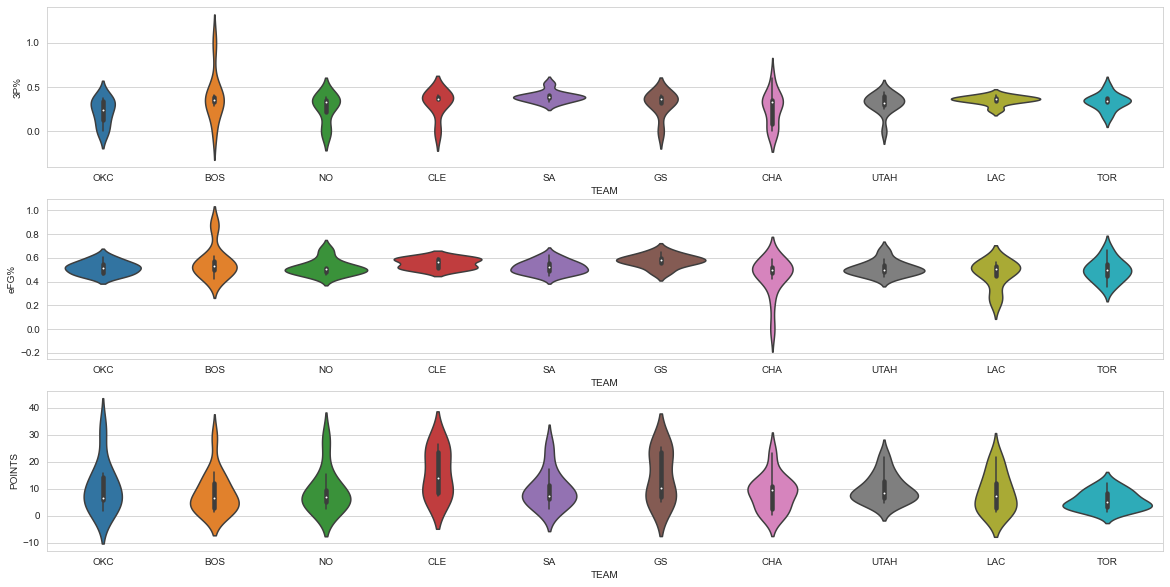

In [ ]:
plt.figure(figsize=(20, 10))
# 进行相应的绘图
plt.subplot(311)
# x，y, hue:   data中的列名, x和y用来显示, hue用来改变颜色
sns.violinplot(x="TEAM", y="3P%", data=data_team2)


plt.subplot(312)
sns.violinplot(x="TEAM", y="eFG%", data=data_team2)


plt.subplot(313)
sns.violinplot(x="TEAM", y="POINTS", data=data_team2)